# **Simple Linear Regression**

In [1]:
# Loading libraries:

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Reading the file using pandas.**

In [2]:
CreditCard = r'C:\Users\prabu\Git hub Repository\Credit-Card-Income-Prediction-1\CreditCard.csv'
df = pd.read_csv(CreditCard)

**Describing the dataset**

In [3]:
df.describe()

,rownames,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,660.000000,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,380.906813,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,1.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330.500000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,660.000000,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,989.500000,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,1319.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


**Shape**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     1319 non-null   int64  
 1   card         1319 non-null   object 
 2   reports      1319 non-null   int64  
 3   age          1319 non-null   float64
 4   income       1319 non-null   float64
 5   share        1319 non-null   float64
 6   expenditure  1319 non-null   float64
 7   owner        1319 non-null   object 
 8   selfemp      1319 non-null   object 
 9   dependents   1319 non-null   int64  
 10  months       1319 non-null   int64  
 11  majorcards   1319 non-null   int64  
 12  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 134.1+ KB


**I used a seed value based on the last 3 digits of my BU ID to create a data partition, assigning approximately 60% of the records to my training set and the other 40% to my validation (or test) set.**

In [5]:
# Partitioning the dataset into training (60%) and validation (40%) sets:
X = df.drop('income', axis=1)
y = df['income']

# Creating a 60-40 train-test split with random_state = 218 (last 3 digits of my BU ID):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=218, shuffle=False)

# Partition details:
print(f"Training set size: {len(X_train)} rows")
print(f"Validation set size: {len(X_test)} rows")

Training set size: 791 rows
Validation set size: 528 rows


**It important to partition the data before doing any sort of in-depth analysis of
the variables**

***Avoids Overfitting:***

*Partitioning the data ensures that the model does not memorize the training data but learns patterns that generalize well to unseen data.*

***Reliable Performance Assessment:***

*By setting aside a validation set, we can accurately assess how the model performs on new data, providing a trustworthy estimate of real-world performance.*

***Enhances Model Selection:***

*Partitioning allows for fair comparisons between different models or algorithms by evaluating each one on the same, unseen validation set.*

***Prevents Data Snooping Bias:***

*Analyzing the full dataset before partitioning can lead to insights from the test data influencing the model, introducing bias and inflating performance metrics.*

***Supports Robust Feature Engineering:***

*Data partitioning enables more objective feature selection by ensuring that feature engineering decisions are validated on independent data.*

**Exploring the Relationship Between Income and Dependents**

**Creating a scatterplot that depicts income on the y-axis and dependents on the x-axis.**

**Adding a best-fit line to this scatterplot. Using only your training set data to build this plot.**

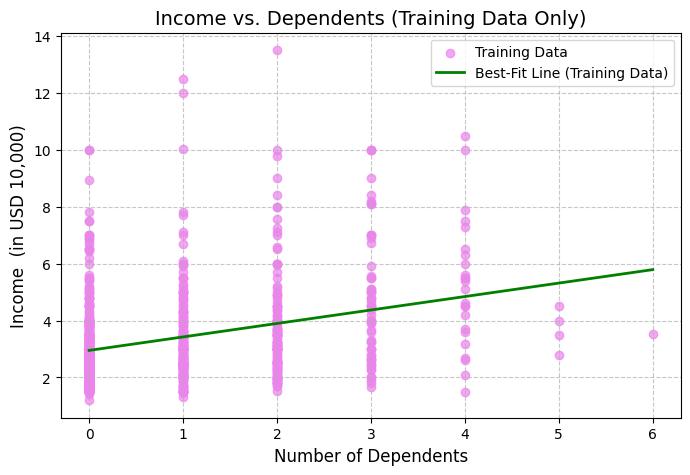

In [6]:
# Separating features and target
X = df[['dependents']]
y = df['income']

# Creating a 60-40 train-test split with random_state = 218 (last 3 digits of my BU ID):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=218,shuffle=False)

# Initializing and training the Linear Regression model on training data only
model = LinearRegression()
model.fit(X_train, y_train)

# Generating predictions for the best-fit line using training data only
x_range = pd.DataFrame(np.linspace(X_train['dependents'].min(), X_train['dependents'].max(), 100), columns=['dependents'])
y_pred_line = model.predict(x_range)

# Creating scatterplot using only the training set
plt.figure(figsize=(8, 5))
plt.scatter(X_train['dependents'], y_train,color='violet', alpha=0.7, label='Training Data')

# Ploting the best-fit line derived from training data
plt.plot(x_range, y_pred_line, color='green', linewidth=2, label='Best-Fit Line (Training Data)')

# Adding title, labels, and legend
plt.title('Income vs. Dependents (Training Data Only)', fontsize=14)
plt.xlabel('Number of Dependents', fontsize=12)
plt.ylabel('Income  (in USD 10,000)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# The plot
plt.show()

***Relationship Between Variables***

*The scatterplot shows a positive relationship between income and number of dependents.*

*The best-fit line has a slight upward slope, indicating that as the number of dependents increases, income tends to increase.*

*The positive trend suggests that individuals with more dependents might generally have higher incomes.*


***Strength of the Relationship***

*The data points are widely scattered around the best-fit line, which indicates a weak linear relationship.*

*The variance in income appears to be large for any given number of dependents, which implies that dependents alone do not strongly explain variations in income.*

*This suggests that other factors, such as education level, job type, or work experience, may have a more significant impact on income.*


***Does This Make Intuitive Sense?***

*Yes, this relationship makes intuitive sense to some extent.*

*More dependents often correlate with higher income because larger households usually need more financial resources.*

*Individuals with greater family responsibilities may seek higher-paying jobs or pursue career growth to support dependents.*

***less people have dependents of 5 and 6:***

*There are very few data points for individuals with 5 or 6 dependents. The limited representation of these higher-dependent households makes it challenging for the model to accurately learn the pattern for these cases.*

**Using training set data only, finding the correlation between income and dependents.**

In [7]:
# Correlation between income and dependents using training set data only
correlation = X_train['dependents'].corr(y_train)

# Correlation value
print(f"Correlation between income and dependents (Training Set Only): {correlation:.4f}")

Correlation between income and dependents (Training Set Only): 0.3169


*Weak Positive Correlation.*

*Interpretation:*

*While there is some positive relationship between the number of dependents and income, it is not particularly strong.*

*The wide scatter of points around the best-fit line in the scatterplot supports this observation.*

**Checking for correlation significance**

In [8]:
# Correlation coefficient and p-value using only the training set
corr_coeff, p_value = pearsonr(X_train['dependents'], y_train)

# Display the results
print(f"Correlation Coefficient: {corr_coeff:.4f}")
print(f"P-value: {p_value:.6f}")

# Checking for significance
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is NOT statistically significant.")

Correlation Coefficient: 0.3169
P-value: 0.000000
The correlation is statistically significant.


*Yes, the correlation is statistically significant.*

*P-value: 0.000000 (effectively 0), which is far below the 0.05 threshold.*

***Significance Interpretation:***

*The likelihood that this relationship occurred by random chance is almost zero.While the relationship is weak, it is statistically valid.*

**Using training set, creating a simple linear regression model, with income as outcome variable and dependents as input variable. Summarizing the results of the model.**

In [9]:
# Initializing and train the Simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model predictions on the training set
y_train_pred = model.predict(X_train)

# Calculating performance metrics
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

# Model summary using sklearn
print("Simple Linear Regression Model Summary (Training Set Only):\n")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Detailed regression summary using statsmodels
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()

# Display the full statistical summary
print("\nFull Regression Summary (Statsmodels):")
print(ols_model.summary())

Simple Linear Regression Model Summary (Training Set Only):

Mean Squared Error (MSE): 2.7145
Mean Absolute Error (MAE): 1.1661

Full Regression Summary (Statsmodels):
                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     88.10
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           6.49e-20
Time:                        23:51:21   Log-Likelihood:                -1517.3
No. Observations:                 791   AIC:                             3039.
Df Residuals:                     789   BIC:                             3048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

**The minimum (most negative) and maximum (most positive) residual values
in this model**

In [10]:
# Calculate residuals for the training set
residuals = y_train - y_train_pred

# Calculate minimum and maximum residual values
min_residual = residuals.min()
max_residual = residuals.max()

# Print the results
print(f"Minimum Residual (Most Negative): {min_residual:.4f}")
print(f"Maximum Residual (Most Positive): {max_residual:.4f}")

Minimum Residual (Most Negative): -3.3433
Maximum Residual (Most Positive): 9.6028


**Finding the Observation Whose Rating Generated the Highest Residual Value in the Model**

In [11]:
# Identifing the index of the observation with the maximum residual
max_residual_index = residuals.idxmax()

# Retrieving the actual income and predicted income for this observation
actual_income = y_train[max_residual_index]
predicted_income = y_train_pred[max_residual_index]

# Calculating the residual manually to verify the result
calculated_residual = actual_income - predicted_income

# Print the results
print(f"Observation with the Highest Residual: Index {max_residual_index}")
print(f"Actual Income: {actual_income:.4f}")
print(f"Predicted Income: {predicted_income:.4f}")
print(f"Calculated Residual: {calculated_residual:.4f}")

Observation with the Highest Residual: Index 113
Actual Income: 13.5000
Predicted Income: 3.8972
Calculated Residual: 9.6028


***Interpretation***

*The positive residual indicates the model underestimated this individual's income by 9.6028 units.*

*The model predicted the income to be 3.8972, but the actual value was 13.5000.*

**Find the Observation Whose Rating Generated the Lowest (i.e., Most Negative) Residual Value**

In [12]:
# Identifing the index of the observation with the minimum residual
min_residual_index = residuals.idxmin()

# Retrieving the actual income and predicted income for this observation
actual_income_min = y_train[min_residual_index]
predicted_income_min = y_train_pred[min_residual_index]

# Calculating the residual manually
calculated_residual_min = actual_income_min - predicted_income_min

# Print the results
print(f"Observation with the Lowest Residual: Index {min_residual_index}")
print(f"Actual Income: {actual_income_min:.4f}")
print(f"Predicted Income: {predicted_income_min:.4f}")
print(f"Calculated Residual: {calculated_residual_min:.4f}")

Observation with the Lowest Residual: Index 787
Actual Income: 1.5000
Predicted Income: 4.8433
Calculated Residual: -3.3433


***Interpretation***

*The negative residual indicates the model overestimated this individual's income by 3.3433 units.*

*The model predicted the income to be 4.8433, but the actual value was only 1.5000.*

**Model Accuracy and Dependents as a Predictor**

*While dependents can serve as an initial indicator for income prediction,since larger households often require higher earnings and it does not perfectly predict income.*

*The correlation of 0.3169 indicates a weak positive relationship, meaning the number of dependents explains only a small portion of the variability in income.*

*The model struggles with ***edge cases***, as seen in these residuals. It underestimated income for the high-income individual and overestimated it for the low-income individual, highlighting the need to include other predictors like age, employment type, or expenditure to better capture income variations.*

# **Part II: Multiple Linear Regression**

In [13]:
df1 = pd.read_csv(CreditCard)

**Building a Correlation Table for Numerical Predictors Using the Training Set**

In [14]:
X1 = df1[['reports','age','share','expenditure','dependents','months','majorcards','active']]
y1 = df1['income']

# Creating a 60-40 train-test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=218, shuffle=False)

              reports       age     share  expenditure  dependents    months  \
reports      1.000000  0.036465 -0.169491    -0.136519   -0.009711  0.002813   
age          0.036465  1.000000 -0.073298     0.060327    0.205628  0.433904   
share       -0.169491 -0.073298  1.000000     0.831369   -0.046175 -0.021730   
expenditure -0.136519  0.060327  0.831369     1.000000    0.083528  0.020141   
dependents  -0.009711  0.205628 -0.046175     0.083528    1.000000  0.077594   
months       0.002813  0.433904 -0.021730     0.020141    0.077594  1.000000   
majorcards  -0.031413  0.009902  0.077969     0.108817    0.030405 -0.037438   
active       0.202346  0.166074  0.019588     0.095448    0.111438  0.126718   

             majorcards    active  
reports       -0.031413  0.202346  
age            0.009902  0.166074  
share          0.077969  0.019588  
expenditure    0.108817  0.095448  
dependents     0.030405  0.111438  
months        -0.037438  0.126718  
majorcards     1.000000  0.

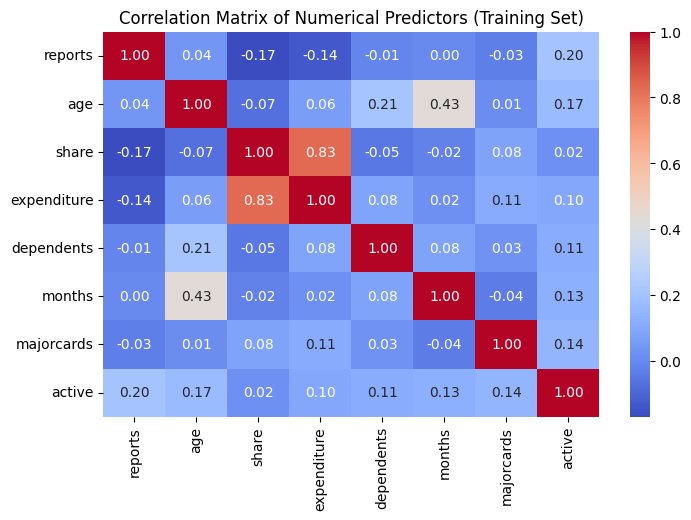

In [15]:
# Correlation matrix for numerical features in the training set
correlation_matrix = X1_train.corr()

# Displaying the correlation matrix
print(correlation_matrix)

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Predictors (Training Set)')
plt.show()

*There are variable relationships that suggest potential multicollinearity issues in this dataset.*

***High Correlation Between 'share' and 'expenditure' (0.83)***

*These two variables are strongly positively correlated, suggesting they provide similar information about spending behavior. Including both might lead to redundancy in the model.*

***Moderate Correlation Between 'months' and 'age' (0.43)***

*While not as strong as the first pair, this moderate correlation suggests that people with more months at their current address tend to be older, which makes intuitive sense.*

***Conclusion:***

*The strongest concern here is the correlation between 'share' and 'expenditure'. Removing one of these variables could improve model performance by reducing multicollinearity.*

***Decision:***

*'Expenditure' was removed because 'share' provides a more normalized representation of credit behavior by accounting for income differences across individuals.*

***Rationale:***

*'Share' is more likely to generalize well across different income levels since it scales expenditure relative to income.*

**Building a Multiple Regression Model Using Backward Elimination**

In [28]:
# Backward elimination function without 'expenditure' (Target Variable)

def backward_elimination(X1_train, y1_train, significance_level=0.05):
    if 'expenditure' in X1_train.columns:
        X1_train = X1_train.drop('expenditure', axis=1)

    # Add a constant term for the intercept
    X1_train = sm.add_constant(X1_train)

    while True:
        # Fit the model and get p-values
        model1 = sm.OLS(y1_train, X1_train).fit()
        p_values = model1.pvalues

        # Identify the maximum p-value
        max_p_value = p_values.max()

        # Remove the predictor with the highest p-value if it exceeds the significance level
        if max_p_value > significance_level:
            worst_feature = p_values.idxmax()
            X1_train = X1_train.drop(worst_feature, axis=1)
            print(f"Removing '{worst_feature}' with p-value: {max_p_value:.4f}")
        else:
            break

    return model1

# Runing backward elimination on the training data

model1 = backward_elimination(X1_train, y1_train)
print(model1.summary())

Removing 'months' with p-value: 0.9041
Removing 'reports' with p-value: 0.8857
Removing 'share' with p-value: 0.8467
                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     50.01
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           1.62e-37
Time:                        23:53:29   Log-Likelihood:                -1469.5
No. Observations:                 791   AIC:                             2949.
Df Residuals:                     786   BIC:                             2972.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

# **Model metrics**

In [17]:
# Total Sum of Squares (SST)
y1_mean = y1_train.mean()
sst = np.sum((y1_train - y1_mean) ** 2)
print(f"SST (Total Sum of Squares): {sst:.4f}")

SST (Total Sum of Squares): 2386.8919


In [18]:
# Total Sum of Squares due to Regression (SSR)
y1_pred = model1.fittedvalues  # Predicted values from the regression model
y1_mean = y1_train.mean()
ssr = np.sum((y1_pred - y1_mean) ** 2)

print(f"SSR (Sum of Squares due to Regression): {ssr:.4f}")

SSR (Sum of Squares due to Regression): 484.2191


In [19]:
# The ratio SSR/SST
ratio = ssr / sst
ratio
print(f"SSR/SST (R-squared): {ratio:.4f}")

SSR/SST (R-squared): 0.2029


**Deriving the p-Value from a t-Value for a Predictor in the Model**

In [20]:
# Given t-value and degrees of freedom
t_value = 3.677
df= 791 - 4 - 1   # (since: df=n−k−1)
df = 786

# Calculating the two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_value), df))

print(f"T-value for 'majorcards': {t_value:.4f}")
print(f"P-value for 'majorcards': {p_value:.6f}")

T-value for 'majorcards': 3.6770
P-value for 'majorcards': 0.000252


**F-Statistic: 50.01**

**p-value: 1 .62e-37** *(very small, suggesting strong evidence against the null hypothesis)*

*The F-statistic in a regression model measures whether the independent variables (predictors) as a group have a statistically significant relationship with the dependent variable.*

***Null Hypothesis:***

*All regression coefficients (except the intercept) are equal to zero — i.e., the predictors have no effect on the dependent variable.*

***Alternative Hypothesis:***

*At least one predictor variable significantly affects the dependent variables.*

*High F-Statistic: Indicates that the model does a better job of explaining the variability in the dependent variable compared to a model with no predictors.*

*Low F-Statistic: Suggests that the model does not provide a significant improvement in explaining the outcome compared to a simple mean-based prediction.*

**Interpretation:**

*Our model explains a significant portion of the variance in income.
The predictors together significantly contribute to the model’s explanatory power.*

**Predicting Income for a Fictional Consumer Using the Model**

In [21]:
# Predicting income for the fictional consumer:
# Coefficients from the model:

intercept = 0.9486
coefficients = {'age': 0.0437, 'dependents': 0.3701, 'majorcards': 0.5357, 'active': 0.0333}

# Consumer's attributes
consumer = {'age': 60, 'dependents': 1, 'majorcards': 4, 'active': 4}

# Predicted income
predicted_income = intercept + sum(consumer[var] * coefficients[var] for var in consumer)

print(f"Predicted Income: ${predicted_income * 10000:.2f}")

Predicted Income: $62167.00


In [22]:
# Using the equation and some simple math:
# Fictional Consumer:

age	= 60
dependents	= 1
majorcards	= 4
active	= 4

y1_pred = (0.9486+(0.0437*age)+(0.3701*dependents)+(0.5357*majorcards)+(0.0333*active)) * 10000

print(f"Predicted Income: ${y1_pred:.2f}")

Predicted Income: $62167.00


**Assessing Model Accuracy on the Training and Validation Sets**

In [23]:
# Selecting only the columns that were retained after backward elimination:
X1_train_reduced = X1_train[['age', 'dependents', 'majorcards', 'active']]
X1_test_reduced = X1_test[['age', 'dependents', 'majorcards', 'active']]

# Adding the constant and predict:
y1_train_pred = model1.predict(sm.add_constant(X1_train_reduced))
y1_test_pred = model1.predict(sm.add_constant(X1_test_reduced))

# Metrics for the training set:
mae_train = mean_absolute_error(y1_train, y1_train_pred)
mse_train = mean_squared_error(y1_train, y1_train_pred)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y1_train, y1_train_pred)

# Metrics for the validation (test) set:
mae_test = mean_absolute_error(y1_test, y1_test_pred)
mse_test = mean_squared_error(y1_test, y1_test_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y1_test, y1_test_pred)

# Results:
print("Training Set Performance:")
print(f"MAE: {mae_train:.4f}, MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}\n")

print("Validation Set Performance:")
print(f"MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

Training Set Performance:
MAE: 1.1010, MSE: 2.4054, RMSE: 1.5509, R²: 0.2029

Validation Set Performance:
MAE: 1.0558, MSE: 2.2343, RMSE: 1.4948, R²: 0.1531


**Interpreting and Describing the Model Results**

*The results show that the model performs slightly better on the validation set than on the training set, with lower MAE, MSE, and RMSE values for the validation data. This is unusual because models typically perform better on training data due to overfitting.*

*The similar performance across both sets indicates the model might be too simple and lacks sufficient predictive power, as evidenced by the relatively low R² values (0.2029 for training and 0.1531 for validation).*

**Overfitting Risk and Accuracy Comparison Between MLR and SLR Models**

***Overfitting Risk***

*Overfitting occurs when a model learns the training data too well, including noise and outliers, and performs poorly on new, unseen data.*

*In this case, the training set performance metrics (MAE: 1.1010, MSE: 2.4054, RMSE: 1.5509, R²: 0.2029) are relatively close to the validation set performance metrics (MAE: 1.0558, MSE: 2.2343, RMSE: 1.4948, R²: 0.1531).*

*The slight gap between training and validation performance indicates minimal overfitting. The model generalizes reasonably well across both datasets.*

***MLR vs. SLR Model Accuracy***

*The SLR model used only one predictor, dependents, and achieved an R² of 0.1004.*

*The MLR model with predictors age, dependents, majorcards, and active increased the R² to 0.2029, which suggests improved explanatory power when more predictors are added.*

*However, the R² is still relatively low, indicating the model only explains about 20.29% of the variation in income, suggesting the predictors may not fully capture the underlying relationship.*

**Limitations of Predicting Income Using Available Variables**

***Limitation of Predicting Income with Available Variables:***

*One significant limitation of using the current set of variables to predict income is the lack of direct income determinants. The features available primarily describe demographic and behavioral patterns (e.g., age, dependents, credit usage patterns) but miss some key drivers of income.*

***Absence of Key Economic Indicators:***

*There is no information about employment type, education level, industry, job tenure, or skills, which are critical factors in determining a person’s income.*

***Static Variables for a Dynamic Outcome:***

*The dataset only captures a snapshot of credit behavior and demographics. Income, however, can change dynamically with job changes, promotions, and economic conditions, none of which are captured here.*

***Potential Non-Linear Relationships:***

*The relationship between these predictors and income may not be linear, yet the model assumes linear relationships. For instance, age might have a non-linear impact on income, peaking at mid-career stages and flattening or declining later.*

***Credit-Focused Data Bias:***

*All predictors relate to credit behavior or demographic factors tied to creditworthiness, which may correlate with income but do not directly explain it. For example, active accounts or major credit cards might reflect credit access but not income level directly.*

***Missing Socioeconomic Context:***

*Factors like location, cost of living, education, family background, and work history are absent. Two individuals with similar credit profiles might have vastly different incomes based on location or educational background.*